# Breast Cancer Diagnosis with Naive Bayes Classifier - Lab 

## Introduction

Breast cancer is the most common form of cancer in women, and the second most common form of
cancer worldwide. The American Cancer Society states that 1.688.780 cancer cases occurred in the
United States in 2017, 35.6% of which led to death. The early diagnosis and prognosis of breast
cancer involves detection and classification of cancerous cells. This has led biomedical and bioinformatics
specialists to become interested in the application of Machine Learning and other AI
methods. These predictive methods proved to be very effective in identifying pathological conditions
in cells and organs.

## Objectives:

You will be able to:

- Perform a detailed classification experiment with SciKitLearn's implementation of Naive Bayes and Wisconsin Breast Cancer Dataset
- Perform necessary data cleaning and pre-processing for machine learning tasks
- Observe the accuracy of NB classifier and take steps for improving accuracy

### Load necessary libraries

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset

The Breast Cancer dataset, first obtained from Dr. William H. Wolberg at the University of
Wisconsin Hospitals, Madison, is composed of 30 continuous variables and 569 observations. The
dataset is based on ten original features describing cancerous cell nuclei derived from a digitized image
of a fine needle aspirate of a breast mass. For each of these ten features, the mean, standard error and
the ’worst’ value (defined as the mean of the three largest values) have been calculated, resulting in a
total of 30 continuous features. The original variable "area", for example, has been split into three separate
features, area_mean, area_SE and area_worst. The dataset reported only these derived features, not
the original variables. The response variable is a categorical variable indicating whether the tumour is
malignant (M) or benign (B). The dataset contains 357 benign and 212 malignant examples. The distribution of
all variables with respect to response variable is shown as violin plot below. 
![](VIOLIN.PNG)

Further details of dataset can be viewed at [UCI machine learning repo](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) . We have downloaded this for you as a CSV file: `data.csv`.

### Import `data.csv` as Pandas Dataframe. Split the dataset to create X (all features) and Y (Target variable)

In [29]:
#importing the dataset 
df = pd.read_csv('data.csv')
df.drop(labels = ['id', 'Unnamed: 32'], axis =1, inplace = True)
print("Cancer data set dimensions : {}".format(df.shape))
X = df.drop('diagnosis', axis = 1)
Y = df.diagnosis
df.head()

Cancer data set dimensions : (569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Find the dimensions of the data set using the panda dataset ‘shape’ attribute.

In [30]:
# Your code here
X.shape

# Cancer data set dimensions : (569, 33)

(569, 30)

### Identify "Malignant" and "Benign" cases in the dataset

In [31]:
# Your code here
Y.value_counts()
# diagnosis
# B    357
# M    212
# dtype: int64

B    357
M    212
Name: diagnosis, dtype: int64

### Visualize the dataset, showing distributions of all features with respect to both target classes

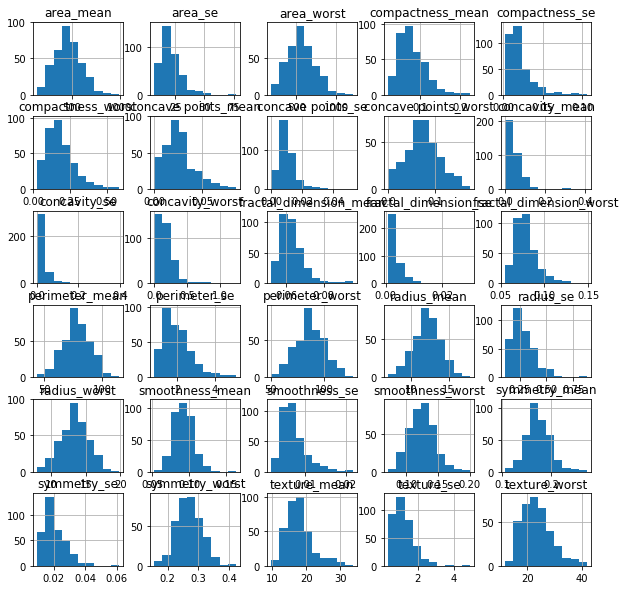

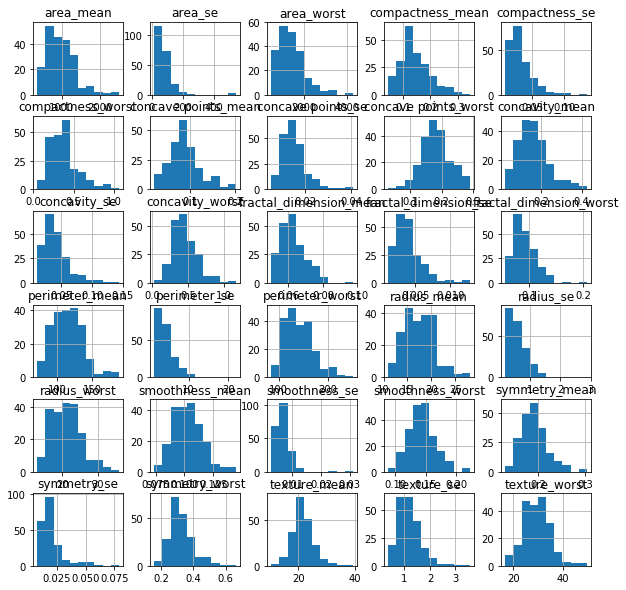

In [32]:
#Visualization of data
X.loc[Y=='B'].hist(figsize = (10,10))
X.loc[Y=='M'].hist(figsize = (10,10))
plt.show()
# Code here 

## Categorical Data

The data pre-processing for this experiment requires standardizing all variables to a [0,1]
interval and coding the categorical response variable to a binary vector (equal to 1 if the tumor is
malignant, and 0 otherwise)

We will use SciKitLearn's `LabelEncoder` to label the categorical data. Label Encoder is  used to convert categorical data, or text data into numbers, which our predictive models can better understand.

[Click here for more details on Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

### Encode "Malignant" and "Benign" in Y to 0/1

In [33]:
# Code here

Y.replace(to_replace = {'M':0, 'B':1}, inplace = True)
Y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
539    1
540    1
541    1
542    1
543    1
544    1
545    1
546    1
547    1
548    1
549    1
550    1
551    1
552    1
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    0
563    0
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

## Data Splitting for Hold-out Validation Testing 

### Perform an 80/20 train/test split to X and Y arrays

In [34]:
# Split the dataset into the Training set and Test set for X and Y 
# Code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature Scaling 

Our dataset contains features highly varying in magnitudes, units and range (do a dataset.describe to inspect this). We need to bring all features to the same level of magnitudes. This can be achieved by scaling i.e. transforming data so that it fits within a specific scale, like 0–100 or 0–1.

We will use SciKitLearn's `StandardScaler` method to standardize features by removing the mean and scaling to unit variance. [Click here to learn more on StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

### Apply `StandardScalar()` to all features in `X_train` and `X-test`

In [35]:
#Feature Scaling
# Code here 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean = True, with_std = True)
scaler.fit(X_train)
Xtrain = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
Xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1.440753,-0.435319,-1.362085,-1.139118,0.780573,0.718921,2.823135,-0.119150,1.092662,2.458173,...,-1.232861,-0.476309,-1.247920,-0.973968,0.722894,1.186732,4.672828,0.932012,2.097242,1.886450
1,1.974096,1.733026,2.091672,1.851973,1.319843,3.426275,2.013112,2.665032,2.127004,1.558396,...,2.173314,1.311279,2.081617,2.137405,0.761928,3.265601,1.928621,2.698947,1.891161,2.497838
2,-1.399982,-1.249622,-1.345209,-1.109785,-1.332645,-0.307355,-0.365558,-0.696502,1.930333,0.954379,...,-1.295284,-1.040811,-1.245220,-0.999715,-1.438693,-0.548564,-0.644911,-0.970239,0.597602,0.057894
3,-0.981797,1.416222,-0.982587,-0.866944,0.059390,-0.596788,-0.820203,-0.845115,0.313264,0.074041,...,-0.829197,1.593530,-0.873572,-0.742947,0.796624,-0.729392,-0.774950,-0.809483,0.798928,-0.134497
4,-1.117700,-1.010259,-1.125002,-0.965942,1.269511,-0.439002,-0.983341,-0.930600,3.394436,0.950213,...,-1.085129,-1.334616,-1.117138,-0.896549,-0.174876,-0.995079,-1.209146,-1.354582,1.033544,-0.205732


In [36]:
scaler = StandardScaler(with_mean = True, with_std = True)
scaler.fit(X_test)
Xtest = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
Xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.487795,-0.250884,-0.463787,-0.515440,0.057840,-0.026292,-0.103512,-0.319293,0.408774,0.119680,...,-0.291867,-0.249224,-0.343372,-0.376935,0.320807,-0.135710,0.021998,-0.219891,0.230839,0.171733
1,1.373257,0.363187,1.292543,1.393120,-0.608296,-0.079938,0.242772,0.675139,-0.855973,-1.298962,...,1.719347,0.052563,1.681975,1.686485,-0.763613,-0.160992,0.029794,0.930195,-0.589588,-0.972629
2,0.372258,-0.051481,0.387730,0.270836,0.723280,0.278933,0.721003,0.707885,0.430898,-0.777860,...,0.580540,-0.037662,0.493153,0.453400,0.879306,-0.126078,0.567720,0.521573,-0.082801,-0.215370
3,-0.507930,-0.459351,-0.448087,-0.556962,0.458497,0.450969,-0.136220,-0.565373,-0.011579,1.253660,...,-0.716886,-0.518344,-0.530104,-0.658460,0.432506,0.015382,-0.108585,-0.632971,-0.580728,0.494230
4,-0.755304,-1.193517,-0.729860,-0.748083,0.071079,0.088398,-0.260610,-0.614733,0.014232,0.755891,...,-0.842969,-1.020805,-0.844128,-0.759191,-0.056181,-0.292219,-0.403859,-0.700133,-0.982968,-0.154471


## Model Development 

With our pre-processing in place, Let's build our model. We shall use the `GaussianNB` to model our data. For this you need to 
- Initialize an instance of classifier
- Fit the model to the X_train and Y_train datasets

This step is same for pretty much all models in SciKitLearn. [Here is the official doc](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) with a few code examples to get you going. 

### Fit the Naive Bayes Classifier

In [40]:
#Fitting Naive_Bayes
# Code here
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(Xtrain,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

The `GaussianNB()` implemented in scikit-learn does not allow you to set class prior. If you read the online documentation, you see .class_prior_ is an attribute rather than parameters. Once you fit the GaussianNB(), you can get access to class_prior_ attribute. It is calculated by simply counting the number of different labels in your training sample.

In [42]:
# Uncomment below to run
clf.class_prior_


# array([0.63736264, 0.36263736])

array([0.37142857, 0.62857143])

Now we can use the `model.predict(test_set)` to make predictions for our test data. [Here is some help](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) o making predictions in scikit learn. As mentioned earlier, this process is almost same for all models in skLearn. 

### Make predictions from trained classifier

In [43]:
# Make Predictions
Y_pred = clf.predict(Xtest)
Y_pred


# array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
#        1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
#        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
#        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
#        0, 1, 1, 0])

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

## Calculate Accuracy

Great now we can bring in our `Y_test` and compare it against `Y_pred` to check the accuracy. 
* You simply measure the number of correct decisions your classifier makes, divide by the total number of test examples, and the result is the accuracy of your classifier.


In [46]:
## Calculate accuracy using formula 
acc= sum(Y_pred == y_test)/len(Y_pred)
print( acc)

# 0.9035087719298246

0.956140350877193


Scikit learn has built in methods to do this. [Check here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) on how to use this.

In [48]:
# Calculate accuracy using scikit learn
# Code here 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_pred)
# 0.9035087719298246

0.956140350877193

## Level up 

- Predicting single example
- Train the classifier using 5-fold cross validation to monitor any improvement/reduction in accuracy 
- Run this dataset with the Numpy implementation in last lab, and compare results

## Summary

In this lab we learned to train and predict from a Naive Bayes Classifier in ScikitLearn. We also calculated accuracy partially, as we could deeper into calculating Type and 2 errors i.e. true positives and false positives to check for Sensitivity and Specificity. We shall leave out detailed evaluation for a later lesson in classification. Next we shall learn a more popular use case of Naive Bayes i.e. Text classification and NLP.  